In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [2]:
train_file = open('/Users/abhinavrohilla/Downloads/Handout HW1P1/Demo Tests HW1/data/digitstrain.txt')
test_file = open('/Users/abhinavrohilla/Downloads/Handout HW1P1/Demo Tests HW1/data/digitstest.txt')

In [3]:
train_data = train_file.readlines()
test_data = test_file.readlines()

In [4]:
class neural_net_without_hidden_layer:
    def __init__(self,file):
        self.file = file
        self.costt = None
        self.weights = None
    
    def load_data(self,file):
        X = []
        Y = []
        for line in range(len(file)):
            split_line = file[line].split(',')
            label = split_line[-1]
            dimension = [float(i) for i in split_line[:-1]]
            Y.append(label[0])
            X.append(dimension)
        return X,Y
    
    def predict_Y(self,X_train,weights):
        predicted_Y_of_all_data = np.dot(X_train,weights)
        return np.exp(predicted_Y_of_all_data) / np.sum(np.exp(predicted_Y_of_all_data), axis=1).reshape(-1,1)
    
    def cost_func(self,predicted_Y_of_all_data,output_Y_of_all_data):
        square_diff = np.power((predicted_Y_of_all_data-output_Y_of_all_data),2)
        return np.sum(square_diff)/output_Y_of_all_data.shape[0]

    def gradient_descent(self,X_train,predict_Y,output_Y):
        #MSE
        grad = -1*(1.0/(X_train.shape[0]))*np.dot((predict_Y-output_Y.todense()).T,X_train).T
        #CROSS ENTROPY
#         grad = 1*np.dot((output_Y/np.log(predict_Y)).T,X_train)
        return grad
    
    def fit(self):
        X,Y = self.load_data(self.file)
        X_train = np.array(X)
        weights = np.random.random(size=(X_train.shape[1],len(set(Y))))
        one_hot = OneHotEncoder()
        output_Y_of_all_data = one_hot.fit_transform(np.array(Y).reshape(len(Y),1))
        iterations = 10
        alpha = 0.01
        self.costt = []
        for i in range(iterations):
            predicted_Y = self.predict_Y(X_train,weights)
            cost = self.cost_func(predicted_Y,output_Y_of_all_data)
            weights = weights + alpha*self.gradient_descent(X_train,predicted_Y,output_Y_of_all_data)
            self.costt.append((self.cost_func(predicted_Y,output_Y_of_all_data)))
        self.weights = weights
    
    def predict(self,file):
        X,Y = self.load_data(file)
        print (self.weights.shape)
        predicted_Y = self.predict_Y(X,self.weights)
        predicted_Y = np.argmax(predicted_Y,axis=1)
        predicted_Y = [int(i) for i in predicted_Y]
        return predicted_Y
        
    

In [5]:
obj = neural_net_without_hidden_layer(train_data)

In [6]:
obj.fit()

In [7]:
costt = obj.costt

In [8]:
X,Y = obj.load_data(train_data)

In [9]:
predicted_Y = obj.predict(test_data)

(784, 10)


In [10]:
X, actual_Y = obj.load_data(test_data)

In [11]:
actual_Y = [int(i) for i in actual_Y]

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
accuracy_score(predicted_Y,actual_Y)

0.8373333333333334

/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


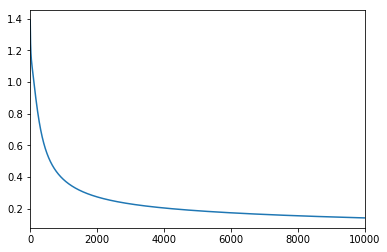

In [15]:
import seaborn as sns
sns.tsplot(costt)